<a href="https://colab.research.google.com/github/AanchalA/PyTorch-Deep-Learning-Bootcamp/blob/main/03_computer_vision_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torch import nn
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


# Dataset


## Data Download

- `ToTensor()` -  Converts image data from PIL/numpy to pytorch compatable data.
    - PIL Images has colour channels last (BATCH SIZE, HEIGHT, WIDTH, COLOUR CHANNELS) **(NHWC)** --> Torch Images have colour channels first (BATCH SIZE, COLOUR CHANNELS, HEIGHT, WIDTH) **(NCHW)**

In [ ]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),            ## Transformation applied on the data
                                   target_transform=None            ## Transformation applied on the labels
                                   )

100%|██████████| 26421880/26421880 [00:09<00:00, 2732784.98it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274359.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5335904.13it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16507857.03it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None
                                  )

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## Image Visualization

Image Shape (colour_channel, height, width): torch.Size([1, 28, 28])
Image Label: 9


Text(0.5, 1.0, 'Ankle boot')

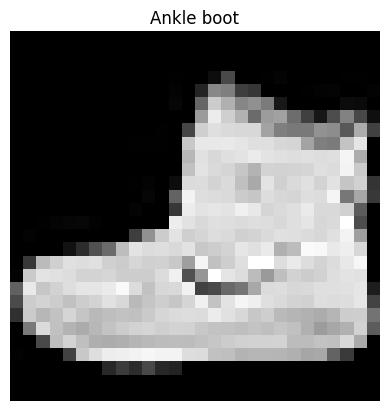

In [ ]:
image, label = train_data[0]
print(f"Image Shape (colour_channel, height, width): {image.shape}")
print(f"Image Label: {label}")
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
plt.title(class_names[label])

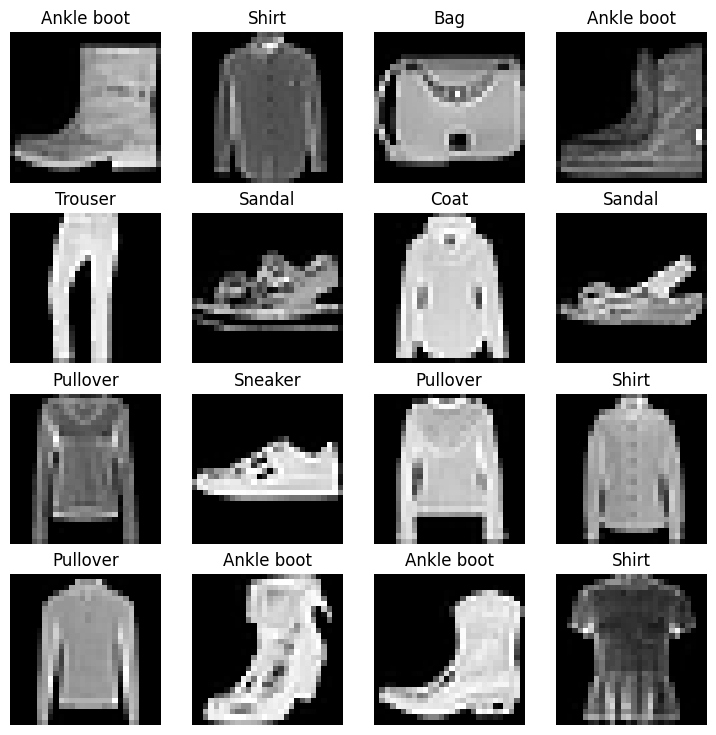

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## Data Preparation for Training

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_data_loader = DataLoader(train_data,
                               shuffle=True,
                               batch_size=BATCH_SIZE)

In [ ]:
test_data_loader = DataLoader(test_data,
                              shuffle=False,
                              batch_size=BATCH_SIZE)

In [ ]:
len(train_data_loader), len(test_data_loader)

(1875, 313)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Shape: torch.Size([1, 28, 28])
Label: 6 | Label Shape: torch.Size([])


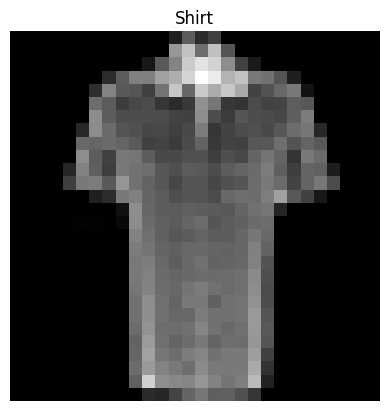

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
print(f"Image Shape: {img.shape}")
print(f"Label: {label} | Label Shape: {label.shape}")
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

# Building the Model


## Model Version 0: Baseline Model

### Building the Model

In [ ]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):           ## Initially x is just pixel information. A linear model can learn from just this.
        return self.layer_stack(x)

In [ ]:
model_v0 = FashionMNISTModelV0(input_shape=(28 * 28),
                               hidden_units=20,
                               output_shape=len(class_names))
model_v0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_v0(dummy_x).shape             ## Here we get one logit per class

torch.Size([1, 10])

In [ ]:
model_v0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [-0.0162,  0.0170,  0.0106,  ...,  0.0111, -0.0152, -0.0014],
                      [ 0.0008, -0.0198, -0.0133,  ...,  0.0030, -0.0313,  0.0080],
                      [-0.0075,  0.0190,  0.0320,  ..., -0.0008, -0.0176, -0.0007]])),
             ('layer_stack.1.bias',
              tensor([ 0.0044,  0.0010,  0.0270, -0.0205,  0.0162,  0.0329, -0.0257, -0.0280,
                       0.0121, -0.0127, -0.0008, -0.0333,  0.0218, -0.0024,  0.0022, -0.0124,
                       0.0124, -0.0006, -0.0142,  0.0089])),
             ('layer_stack.2.weight',
              tensor([[-0.0830,  0.0830, -0.2142, -0.0865, -0.1532,  0.0951, -0.1570,  0.1733,
          

### Setup Loss Function, Optimizer and Evaluation Metrics

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v0.parameters(), lr=0.1)

In [ ]:
import requests
from pathlib import Path

file_name = "helper_functions.py"
RAW_URL = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

if Path(file_name).is_file():
    print(f"File {file_name} already exists, skipping download.")
else:
    print(f"Downloading file {file_name} from {RAW_URL}")
    response = requests.get(RAW_URL)
    with open(file_name, "wb") as f:
        f.write(response.content)

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

### Timing Our Experiments

In [ ]:
from timeit import default_timer as timer

In [ ]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
    """ Print difference between start and end time. """
    total_execution_time = end - start
    print(f"\nTrain time on {device}: {total_execution_time} seconds")
    return total_execution_time

In [ ]:
start = timer()
end = timer()
print_train_time(start, end, device="cpu")


Train time on cpu: 5.8910000007017516e-05 seconds


5.8910000007017516e-05

### Creating a Training Loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

EPOCHS = 3

In [ ]:
train_time_start_on_cpu = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f"\nEPOCH #: {epoch} \n", "-"*30)

    ### Training
    train_loss = 0
    model_v0.train()
    # Looping through the batches
    for batch, (X, y) in enumerate(train_data_loader):
        train_preds = model_v0(X)
        train_batch_loss = loss_fn(train_preds, y)
        train_loss += train_batch_loss           ##  Adding the training loss for each batch
        optimizer.zero_grad()
        train_batch_loss.backward()
        optimizer.step()                         ## Optimizer will update the model parameters once per batch rather than once per epoch

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_data)} samples.")

    # Taking the average of the train loss over the number of batches per epoch
    train_loss /= len(train_data_loader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_v0.eval()
    with torch.inference_mode():
        # Looping through the test data batches
        for X_test, y_test in test_data_loader:
            test_preds = model_v0(X_test)
            test_loss_batch = loss_fn(test_preds, y_test)
            test_loss += test_loss_batch
            test_acc += accuracy_fn(y_test, test_preds.argmax(dim=1))

        # Taking the average of the test loss
        test_loss /= len(test_data_loader)
        # Taking the average of the test accuracy
        test_acc /= len(test_data_loader)

    print(f"\nTrain Loss: {train_loss: .5f} | Test Loss: {test_loss: .5f}, Test Accuracy: {test_acc: .2f}%")

train_time_end_on_cpu = timer()
total_train_time_model_v0 = print_train_time(start=train_time_start_on_cpu,
                                             end=train_time_end_on_cpu,
                                             device=next(model_v0.parameters()).device
                                             )

  0%|          | 0/3 [00:00<?, ?it/s]


EPOCH #: 0 
 ------------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.58061 | Test Loss:  0.50123, Test Accuracy:  82.42%

EPOCH #: 1 
 ------------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.47448 | Test Loss:  0.48475, Test Accuracy:  82.88%

EPOCH #: 2 
 ------------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss:  0.45400 | Test Loss:  0.47797, Test Accuracy:  83.43%

Train time on cpu: 46.33397919499998 seconds


In [ ]:
str(next(model_v0.parameters()).device)

'cpu'

### Setting up Device Agnostic Code

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model Evaluation

In [ ]:
torch.manual_seed(42)
def evaluate_model(model: torch.nn.Module,
                   data_loader: torch.utils.data.DataLoader,
                   loss_fn: torch.nn.Module,
                   accuracy_fn,
                   device: torch.device=device):
    """ Returns a dictionary containing the results of model predictions on the dataloader. """

    loss, accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)          ## Accumulating the loss over all the batches
            accuracy += accuracy_fn(y, y_pred.argmax(dim=1))

        # Taking the average of loss and accuracy
        loss /= len(data_loader)
        accuracy /= len(data_loader)

    return {"model_name": model.__class__.__name__,             ## This only works when the model was created with a class, will return class name.
            "model_loss": loss.item(),
            "model_accuracy": accuracy
            }

In [ ]:
# Calculating model_v0 results on the test dataset.
model_v0_results = evaluate_model(model=model_v0,
                                  data_loader=test_data_loader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)
model_v0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4779733717441559,
 'model_accuracy': 83.42651757188499}

## Model Version 1: Model with Non-Linearity

### Building the Model

In [ ]:
class FashionMNISTModelV1(nn.Module):

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):           ## Initially x is just pixel information. A linear model can learn from just this.
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_v1 = FashionMNISTModelV1(input_shape=784,         ## 28*28
                               hidden_units=10,
                               output_shape=len(class_names)
                               ).to(device)
model_v1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_v1.parameters()).device

device(type='cpu')

### Initilizing the Loss Function, Optimizer and Evaluation Metrics

In [ ]:
from helper_functions import accuracy_fn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(),
                            lr=0.1)

In [ ]:
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

### Creating the Training and Testing Loop

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):

    """ Performs the training with model trying to learn on the dataloader. """

    train_loss, train_acc = 0, 0

    model.to(device)
    # model.train()

    for batch, (X_train, y_train) in enumerate(data_loader):

        X_train, y_train = X_train.to(device), y_train.to(device)

        train_logits = model(X_train)
        train_preds = torch.softmax(train_logits, dim=1).argmax(dim=1)

        train_loss_batch = loss_fn(train_logits, y_train)
        train_loss += train_loss_batch
        train_acc += accuracy_fn(y_true=y_train, y_pred=train_preds)

        optimizer.zero_grad()
        train_loss_batch.backward()
        optimizer.step()

    # Taking the average loss and accuracy.
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train Loss: {train_loss: .5f} | Train Accuracy: {train_acc: .2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

    """ Performs testing on the model going over the data loader. """

    test_loss, test_acc = 0, 0

    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:

            X_test, y_test = X_test.to(device), y_test.to(device)

            test_logits = model(X_test)
            test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

            test_loss += loss_fn(test_logits, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_preds)

        # Taking the average loss and accuracy.
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f"Test Loss: {test_loss: .5f} | Test Accuracy: {test_acc: .2f}%")

### Timing our Experiments

In [ ]:
from timeit import default_timer as timer

### Training the Model

In [ ]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

EPOCHS = 3

In [ ]:
train_time_start_on_gpu = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f"\nEPOCH: {epoch}\n", "-"*30)

    train_step(model=model_v1,
               data_loader=train_data_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)


    test_step(model=model_v1,
              data_loader=test_data_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_v1 = print_train_time(start=train_time_start_on_gpu,
                                             end=train_time_end_on_gpu,
                                             device=next(model_v1.parameters()).device
                                             )

  0%|          | 0/3 [00:00<?, ?it/s]


EPOCH: 0
 ------------------------------
Train Loss:  1.09199 | Train Accuracy:  61.34%
Test Loss:  0.95636 | Test Accuracy:  65.00%

EPOCH: 1
 ------------------------------
Train Loss:  0.78101 | Train Accuracy:  71.93%
Test Loss:  0.72227 | Test Accuracy:  73.91%

EPOCH: 2
 ------------------------------
Train Loss:  0.67027 | Train Accuracy:  75.94%
Test Loss:  0.68500 | Test Accuracy:  75.02%

Train time on cpu: 37.506235465 seconds


In [ ]:
model_v0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4779733717441559,
 'model_accuracy': 83.42651757188499}

In [ ]:
# Calculating model_v0 results on the test dataset.
model_v1_results = evaluate_model(model=model_v1,
                                  data_loader=test_data_loader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)
model_v1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_accuracy': 75.01996805111821}

## Model Version 2: Convolutional Neural Network



### Building the Model
- https://poloclub.github.io/cnn-explainer/
---

- We use Conv2D for image data (2 dimensional data - height and width)
- Conv1D can be used for one dimensional data like audio data.
- Conv3D can be used for three dimensional data.

In [ ]:
class FashionMNISTModelV2(nn.Module):
    """ This Model Replicates the TinyVGG architecture """
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,       # based on input image size, (7*7 pixels) and we have "hidden_units" features per pixel.
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv2d_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv2d_block_2: {x.shape}")
        x = self.classification(x)
        # print(f"Output shape of classification: {x.shape}")
        return x


In [ ]:
torch.manual_seed(42)
model_v2 = FashionMNISTModelV2(input_channels=1,
                               hidden_units=10,
                               output_shape=len(class_names)
                               ).to(device)
model_v2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

torch.Size([1, 28, 28])


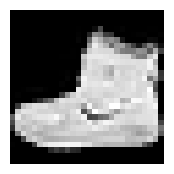

In [ ]:
plt.figure(figsize=(3,2))
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
print(image.shape)         ##  Here the number of channels is = 1

In [ ]:
# Passing the image through the model
model_v2.eval()
with torch.inference_mode():
    output = model_v2(image.unsqueeze(dim=1))
output

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]])

### Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# # Creating Dummy Data

images = torch.randn(size=(32, 3, 64, 64))          ## (batch size, num_channels, height, width)
test_image = images[0]

print(f"Batched Images Shape: {images.shape}")
print(f"Single Image Shape: {test_image.shape}")
print(f"Looking at a image data: \n {test_image}")

Batched Images Shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])
Looking at a image data: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563

In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,               ## Number of channels in the input image
                       out_channels=10,             ## Number of filters applied to the input image.
                       kernel_size=3, stride=1, padding=1)

# Passing an image data through the conv_layer
if test_image.ndim == 3:
    test_image = test_image.unsqueeze(dim=0)                   ## Adding a batch dimension at dim=0, it works without adding this dim as well.
conv_output = conv_layer(test_image)
test_image.shape, conv_output.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1, 10, 64, 64]))

In [ ]:
conv_output

tensor([[[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
          [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
          [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
          ...,
          [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
          [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
          [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

         [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
          [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
          [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
          ...,
          [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
          [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
          [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

         [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
          [-0.5791,  0.4414,  

### Stepping through `nn.MaxPool2d()` Layer

In [ ]:
print(f"Shape of original image: {test_image.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through the conv layer
test_data_through_conv_layer = conv_layer(test_image)
print(f"Shape after going through the conv_layer(): {test_data_through_conv_layer.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool_layer = max_pool_layer(test_data_through_conv_layer)
print(f"Shape after going through the conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool_layer.shape}")

Shape of original image: torch.Size([1, 3, 64, 64])
Shape after going through the conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through the conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Shape of original image: {random_tensor.shape}")
print(f"original image data: \n{random_tensor}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through the max pool layer
random_tensor_through_max_pool_layer = max_pool_layer(random_tensor)
print(f"\nShape after going through the max_pool_layer(): {random_tensor_through_max_pool_layer.shape}")
print(f"Data after going through the max_pool_layer(): \n{random_tensor_through_max_pool_layer}")

Shape of original image: torch.Size([1, 1, 2, 2])
original image data: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Shape after going through the max_pool_layer(): torch.Size([1, 1, 1, 1])
Data after going through the max_pool_layer(): 
tensor([[[[0.3367]]]])


### Setting up the Loss Function, Optimizer and Evalutation Metric

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(),
                            lr=0.1)

In [ ]:
from helper_functions import accuracy_fn
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

### Building the train and test loop using train_step() and test_step() functions

In [ ]:
from timeit import default_timer as timer

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

EPOCHS = 3

train_time_start_model_v2 = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f"EPOCH: {epoch}\n", "-"*30)

    train_step(model=model_v2, data_loader=train_data_loader, loss_fn=loss_fn,
               optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)

    test_step(model=model_v2, data_loader=test_data_loader, loss_fn=loss_fn,
              accuracy_fn=accuracy_fn, device=device)

train_time_end_model_v2 = timer()
total_train_time_model_v2 = print_train_time(start=train_time_start_model_v2,
                                             end=train_time_end_model_v2,
                                             device=next(model_v2.parameters()).device
                                             )

  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH: 0
 ------------------------------
Train Loss:  0.59518 | Train Accuracy:  78.38%
Test Loss:  0.39500 | Test Accuracy:  85.99%
EPOCH: 1
 ------------------------------
Train Loss:  0.36536 | Train Accuracy:  86.90%
Test Loss:  0.35244 | Test Accuracy:  86.91%
EPOCH: 2
 ------------------------------
Train Loss:  0.32588 | Train Accuracy:  88.13%
Test Loss:  0.32719 | Test Accuracy:  88.07%

Train time on cpu: 222.747539529 seconds


In [ ]:
model_v0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4779733717441559,
 'model_accuracy': 83.42651757188499}

In [ ]:
model_v1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_accuracy': 75.01996805111821}

In [ ]:
# Calculating model_v0 results on the test dataset.
model_v2_results = evaluate_model(model=model_v2,
                                  data_loader=test_data_loader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)
model_v2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

## Comparing the model results and training time

In [ ]:
import pandas as pd

In [ ]:
compare_resuts = pd.DataFrame([model_v0_results,
                               model_v1_results,
                               model_v2_results])
compare_resuts["training_time"] = [total_train_time_model_v0,
                                   total_train_time_model_v1,
                                   total_train_time_model_v2]

In [ ]:
compare_resuts

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModelV0,0.477973,83.426518,46.333979
1,FashionMNISTModelV1,0.685001,75.019968,37.506235
2,FashionMNISTModelV2,0.327190,88.069089,222.747540


### Visualizing the results

Text(0, 0.5, 'Model')

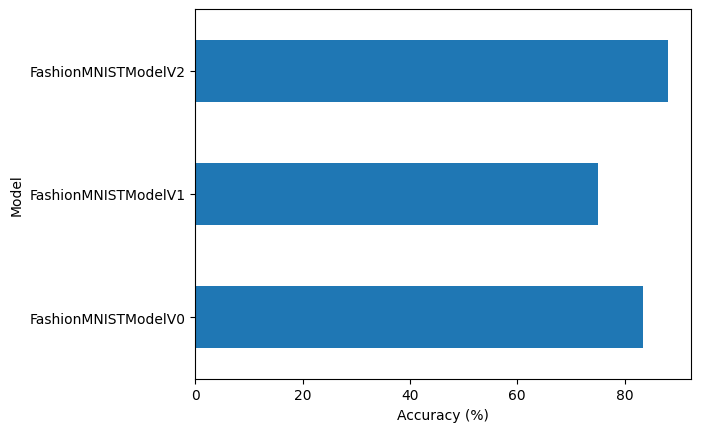

In [ ]:
compare_resuts.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

## Make and evaluate best model with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs = list()
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Adding the batch dimension to sample and moving the data to target device
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward Pass
            pred_logits = model(sample).squeeze()       ## Removing the batch dimension

            # Getting the prediction probabilities
            pred_prob = torch.softmax(pred_logits, dim=0)

            # Moving pred_prob to the cpu for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stacking the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

Text(0.5, 1.0, 'Shirt')

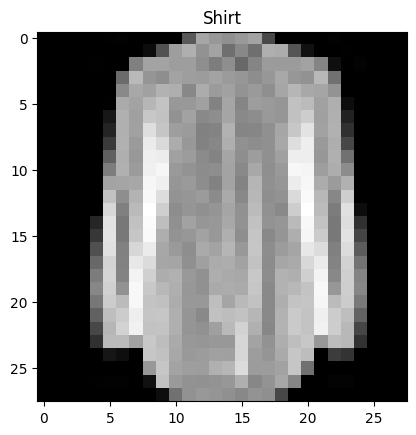

In [ ]:
import random

# random.seed(42)

test_samples = list()
test_labels = list()

for sample, label in random.sample(list(test_data), k=9):           ## Taking random 9 samples
    test_samples.append(sample)
    test_labels.append(label)

# View the first samples shape
test_samples[0].shape
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make Predictions

pred_probs = make_predictions(model=model_v2,
                              data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 7, 7, 1, 6, 1, 5, 0, 8])

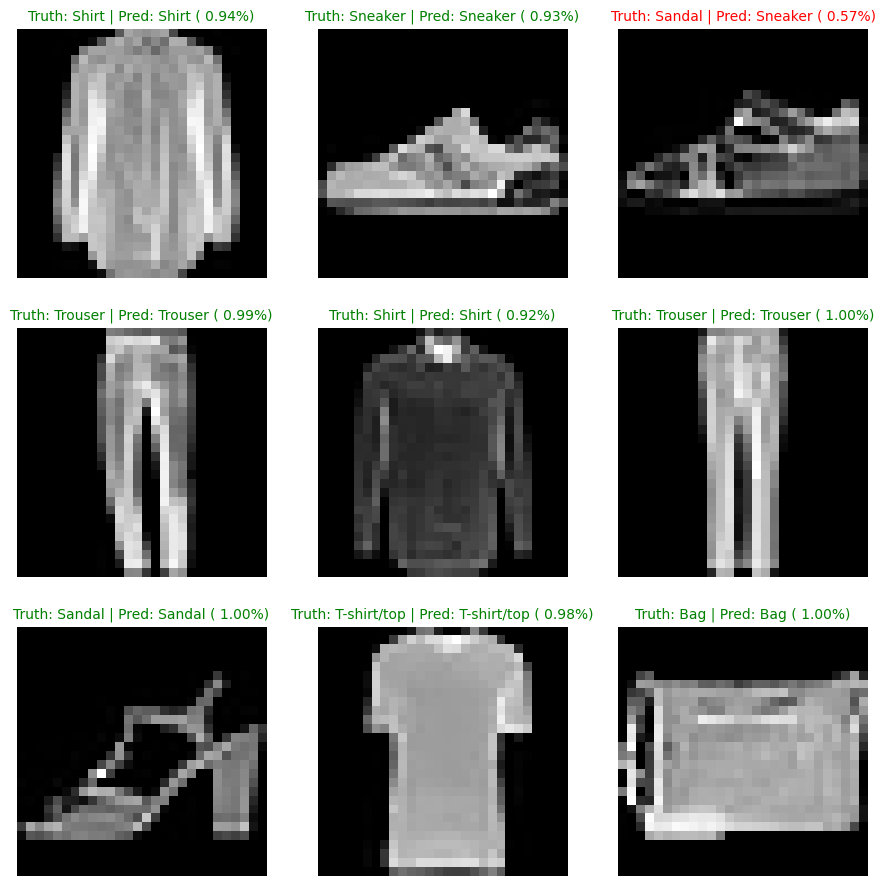

In [ ]:
# Plot Predictions

plt.figure(figsize=(11, 11))
n_rows, n_cols = 3, 3

for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(n_rows, n_cols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Get the prediction label
    pred_label = class_names[pred_classes[i]]

    # Get the ground truth label
    true_label = class_names[test_labels[i]]

    # Title
    title_text = f"Truth: {true_label} | Pred: {pred_label} ({pred_probs[i].max().item(): .2f}%)"

    if pred_label == true_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

### Making a Confusion Matrix

In [ ]:
y_preds = list()

model_v2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_data_loader, desc="Making predictions ..."):
        # Move data to GPU
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logits = model_v2(X)

        # Get labels
        y_label = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

        # Put predictions on cpu
        y_preds.append(y_label)


# Cocatenate list of predictions into tensors
# print(y_preds)
y_preds_torch = torch.cat(y_preds)
y_preds_torch[:10]

Making predictions ...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_preds_torch)

10000

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    ! pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 14.3 MB/s eta 0:00:00
mlxtend version: 0.23.1


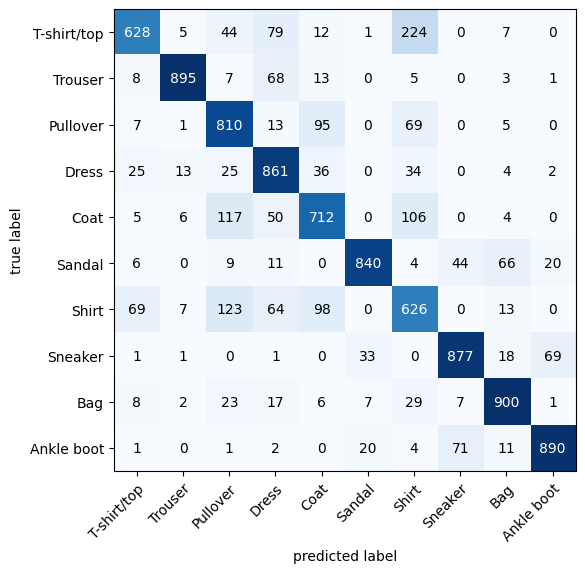

In [ ]:
conf_mat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
conf_mat_tensor = conf_mat(preds=y_preds_torch,
                           target=test_data.targets)

fig, plt = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(), class_names=class_names, figsize=(8, 6))

# Saving and loading the model

## Saving the model

In [ ]:
from pathlib import Path

In [ ]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_version_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the model state_dict to {MODEL_SAVE_PATH}")
torch.save(f=MODEL_SAVE_PATH, obj=model_v2.state_dict())

Saving the model state_dict to models/03_pytorch_computer_vision_model_version_2.pth


Loading the model

In [ ]:
torch.manual_seed(42)

loaded_model_v2 = FashionMNISTModelV2(input_channels=1,
                                      hidden_units=10,
                                      output_shape=len(class_names)
                                      )
loaded_model_v2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loaded_model_v2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_v2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_v2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [ ]:
# Evaluate the loaded model
# Calculating model_v0 results on the test dataset.
loaded_model_v2_results = evaluate_model(model=loaded_model_v2,
                                         data_loader=test_data_loader,
                                         loss_fn=loss_fn,
                                         accuracy_fn=accuracy_fn)
loaded_model_v2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_accuracy': 88.06908945686901}

In [ ]:
# Check if the results of the two models are close

torch.isclose(torch.tensor(model_v2_results["model_loss"]),
              torch.tensor(loaded_model_v2_results["model_loss"]),
              atol=1e-02)                   ## Absolute Tolerance

tensor(True)